<a href="https://colab.research.google.com/github/cocogne2/projet6/blob/master/projet_propre_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importation des librairies et montage du drive

In [1]:
import tensorflow as tf
from google.colab import drive 
from lxml import etree
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
drive.mount('/content/gdrive', force_remount=True)
path_to_data = os.path.join('gdrive','My Drive','projet_6')

Mounted at /content/gdrive


Installation de livelossplot. Cette librairie permet de faire les graphiques pendant l'estimation qui sont inclus dans la présentation

In [2]:
pip install livelossplot

Cropping et resizing des images

In [ ]:
def cpu():
  %matplotlib inline
  path=os.path.join(path_to_data,'Images')
  for folder in os.listdir(path): 
      if os.path.isdir(os.path.join(path,folder)):
          print("folder",folder)
          path2=os.path.join(path,folder)
          race_chien=folder.split("-",1)[1]
          for file in os.listdir(path2):
            file=file.split(".")[0]
            nom_chien=file.split("_")[1]
            print("file:",file)
            tree = etree.parse(os.path.join(path_to_data,'Annotation', folder, file))
            for x in tree.xpath("/annotation/object/bndbox/xmin"):
                x_min=int(x.text)
            for x in tree.xpath("/annotation/object/bndbox/xmax"):
                x_max=int(x.text)
            for y in tree.xpath("/annotation/object/bndbox/ymin"):
                y_min=int(y.text)
            for y in tree.xpath("/annotation/object/bndbox/ymax"):
                y_max=int(y.text)
            
            # Import the image
            
            im = Image.open(os.path.join(path_to_data,'Images', folder, file+".jpg"))
            im=im.crop((x_min,y_min,x_max,y_max))             
            file_save=race_chien+"*"+nom_chien
            file_name = os.path.join(path_to_data,'images_crop_112_size',file_save+".jpg")

            width, height = im.size
            if width>height:
              new_width=112
              size_index=new_width/width
              new_height=round(height*size_index)
            if width<=height:
              new_height=112
              size_index=new_height/height
              new_width=round(width*size_index)
            im=im.resize((new_width,new_height),Image.ANTIALIAS)
            new_im = Image.new("RGB", (112,112))
            new_im.paste(im, (round((112-new_width)/2),
                                round((112-new_height)/2)))
            new_im.save(file_name)
        
cpu()

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
file: n02108551_4341
file: n02108551_3980
file: n02108551_4426
file: n02108551_4379
file: n02108551_3840
file: n02108551_4682
file: n02108551_3814
file: n02108551_4392
file: n02108551_441
file: n02108551_5216
file: n02108551_5682
file: n02108551_572
file: n02108551_5004
file: n02108551_4807
file: n02108551_581
file: n02108551_4927
file: n02108551_4751
file: n02108551_4790
file: n02108551_5547
file: n02108551_5050
file: n02108551_4698
file: n02108551_4820
file: n02108551_4918
file: n02108551_4769
file: n02108551_4697
file: n02108551_5540
file: n02108551_5625
file: n02108551_598
file: n02108551_9132
file: n02108551_6295
file: n02108551_902
file: n02108551_7788
file: n02108551_899
file: n02108551_786
file: n02108551_658
file: n02108551_5830
file: n02108551_734
file: n02108551_640
file: n02108551_6179
file: n02108551_832
file: n02108551_810
file: n02108551_8370
file: n02108551_668
file: n02108551_660
file: n02108

Utilisation du filtre CLAHE comme égaliseur d'images

In [ ]:
import cv2
  
path=os.path.join(path_to_data,'images_crop_112_size')
for file in os.listdir(path): # Reading the image from the present directory
  print(file)
  image = cv2.imread(os.path.join(path, file)) 
  # The declaration of CLAHE 
  # clipLimit -> Threshold for contrast limiting
  image_bw =  cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
  lab_planes = cv2.split(image_bw)
  clahe = cv2.createCLAHE(clipLimit = 2)
  lab_planes[0] = clahe.apply(lab_planes[0])
  lab = cv2.merge(lab_planes)
  bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)    
  cv2.imwrite(os.path.join(path_to_data,'images_crop_112_size_clahe_2',file), bgr)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Tibetan_mastiff*2948.jpg
Tibetan_mastiff*2836.jpg
Tibetan_mastiff*2611.jpg
Tibetan_mastiff*3147.jpg
Tibetan_mastiff*3482.jpg
Tibetan_mastiff*2861.jpg
Tibetan_mastiff*351.jpg
Tibetan_mastiff*2596.jpg
Tibetan_mastiff*2778.jpg
Tibetan_mastiff*290.jpg
Tibetan_mastiff*262.jpg
Tibetan_mastiff*2667.jpg
Tibetan_mastiff*2514.jpg
Tibetan_mastiff*4507.jpg
Tibetan_mastiff*3522.jpg
Tibetan_mastiff*3662.jpg
Tibetan_mastiff*3737.jpg
Tibetan_mastiff*4286.jpg
Tibetan_mastiff*4310.jpg
Tibetan_mastiff*4309.jpg
Tibetan_mastiff*4284.jpg
Tibetan_mastiff*462.jpg
Tibetan_mastiff*4421.jpg
Tibetan_mastiff*433.jpg
Tibetan_mastiff*3578.jpg
Tibetan_mastiff*369.jpg
Tibetan_mastiff*4340.jpg
Tibetan_mastiff*4236.jpg
Tibetan_mastiff*4341.jpg
Tibetan_mastiff*3980.jpg
Tibetan_mastiff*4426.jpg
Tibetan_mastiff*4379.jpg
Tibetan_mastiff*3840.jpg
Tibetan_mastiff*4682.jpg
Tibetan_mastiff*3814.jpg
Tibetan_mastiff*4392.jpg
Tibetan_mastiff*441.jpg
Tibe

Configuration des paramètres principaux du modèle

In [4]:

# Le chemin vers la sauvegarde du réseau
model_savepath    = os.path.join(path_to_data,'propre_cnn_3')     

# Les chemins vers les jeu de données
TRAINING_DIR      = os.path.join(path_to_data,'images_crop_112_size_clahe_2')

IMGSIZE       = 112    # Taille de l'image en input
EPOCH         = 25     # nombre d'epoch 
BATCH_SIZE    = 25     # traitement par batch d'images avant la descente de gradient
TRAIN         = True   # Entrainement ou utilisation d'un réseau déjà entrainé

In [5]:
def list_unique(list_unique):
    """
    Cette fonction prend une liste en entrée et retourne la liste sans doublon
    """
    new_list = [] 
    for i in list_unique : 
        if i not in new_list: 
            new_list.append(i) 
    return new_list

Constitution des jeux de données

In [7]:
# Dataframe de deux colonnes contenant les id des fichiers et leur label
train_files = os.listdir(TRAINING_DIR)
train_labels = []

for file in train_files:
    train_labels.append(file.split("*",1)[0])
labels_sans_doublon=list_unique(train_labels)
df = pd.DataFrame({"id": train_files, "label": train_labels})
X=df["id"]
y=df["label"]
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25,stratify=y, random_state=1 ) # 25% des données dans le jeu de test
df_train =pd.DataFrame({"id": X_train, "label": y_train})
df_valid =pd.DataFrame({"id": X_test,  "label": y_test})

Importation des bibliothèques nécessaires à la création du modèle

In [8]:
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

Jeu d'entrainement

In [9]:
# Image generator: attention il est préférable de ne pas utiliser d'augmentation de données
# Nous utilisons également un processing spécifique au VGG16 et non pas un rescale 1./255
train_datagen =  \
        ImageDataGenerator(
            preprocessing_function=preprocess_input,
            validation_split=0)

train_generator = \
        train_datagen.flow_from_dataframe(
            df_train,
            TRAINING_DIR,
            x_col='id',
            y_col='label',
            shuffle=True,
            target_size=(IMGSIZE, IMGSIZE),
            batch_size=BATCH_SIZE,
            subset='training',
            class_mode='categorical')
train_labels = to_categorical(train_generator.classes)

Found 15435 validated image filenames belonging to 120 classes.


Jeu de validation

In [10]:
valid_datagen =  \
        ImageDataGenerator(
            preprocessing_function=preprocess_input, validation_split=0)
       
valid_generator = \
        valid_datagen.flow_from_dataframe(
            df_valid,
            TRAINING_DIR,
            x_col='id',
            y_col='label',
            shuffle=True,
            target_size=(IMGSIZE, IMGSIZE),
            batch_size=BATCH_SIZE,
            subset='training',
            class_mode='categorical')

Found 5145 validated image filenames belonging to 120 classes.


Création du modèle CNN et compilation

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
my_model = Sequential()  # Création d'un réseau de neurones vide 
my_model.add(Conv2D(64, (3, 3), input_shape=(IMGSIZE, IMGSIZE, 3), padding='same', activation='tanh'))
my_model.add(Conv2D(64, (3, 3), padding='same', activation='tanh'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

my_model.add(Conv2D(128, (3, 3), padding='same', activation='tanh'))
my_model.add(Conv2D(128, (3, 3), padding='same', activation='tanh'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

my_model.add(Conv2D(256, (3, 3), padding='same', activation='tanh'))
my_model.add(Conv2D(256, (3, 3), padding='same', activation='tanh'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

my_model.add(Conv2D(512, (3, 3), padding='same', activation='tanh'))
my_model.add(Conv2D(512, (3, 3), padding='same', activation='tanh'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

from keras.layers import Flatten, Dense, Dropout
my_model.add(Flatten())  # Conversion des matrices 3D en vecteur 1D
my_model.add(Dropout(0.5))

my_model.add(Dense(1000,activation="tanh"))
my_model.add(Dense(1000,activation="tanh"))
my_model.add(Dense(200,activation="tanh"))
#my_model.add(Dropout(0.2))
# Ajout de la dernière couche fully-connected qui permet de classifier
my_model.add(Dense(len(labels_sans_doublon), activation='softmax'))


# compilation du modele
opt = tf.keras.optimizers.SGD()
my_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(my_model.summary())

Fitting et sauvegarde du modèle

In [ ]:
import time
t1=time.time()
from livelossplot.inputs.keras import PlotLossesCallback
if (TRAIN):
    plot_loss_1 = PlotLossesCallback()

    # Création des Callbacks à appeler aprés chaque epoch
    #   pour sauvegarde des résultats
    checkpoint = ModelCheckpoint("model_1.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
    #   pour arrêt prématuré
    early = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
    
#   history = net_final.fit(train_generator,steps_per_epoch = STEP_SIZE_TRAIN, epochs=EPOCH, validation_data=valid_generator,validation_steps = STEP_SIZE_VALID,callbacks = [checkpoint, early, plot_loss_1])
    history = my_model.fit(train_generator, epochs=EPOCH, validation_data=valid_generator,batch_size=BATCH_SIZE,callbacks = [checkpoint, early, plot_loss_1])
    # Sauvegarde du réseau après entrainement
    my_model.save(model_savepath)    
t2=time.time()
print("temps en min: {}".format((t2-t1)/60))

Importation du modèle sauvegardé

In [11]:
from tensorflow import keras
net_final = keras.models.load_model(model_savepath)
print(net_final.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 112, 112, 64)      1792      
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 56, 56, 128)       73856     
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 56, 56, 128)       147584    
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 28, 28, 256)     

Evaluation du modèle

In [13]:
(eval_loss, eval_accuracy) = net_final.evaluate(valid_generator, batch_size=BATCH_SIZE)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))

206/206 [==============================] - 865s 4s/step - loss: 3.6207 - accuracy: 0.1870
[INFO] accuracy: 18.70%
[INFO] Loss: 3.620678424835205


Création des données servant à tester le modèle

In [14]:
class_dict=train_generator.class_indices
labels= train_generator.labels

new_dict={}
for key,value in class_dict.items():
        new_dict[value]=key 
valid2_generator = \
        valid_datagen.flow_from_dataframe(
            df_valid,
            TRAINING_DIR,
            x_col='id',
            y_col='label',
            shuffle=False,
            target_size=(IMGSIZE, IMGSIZE),
            batch_size=BATCH_SIZE,
            subset='training',
            class_mode='categorical')
true_labels=valid2_generator.labels

Found 5145 validated image filenames belonging to 120 classes.


Rapport de classification et confusion matrix

Classification Report
                                precision    recall  f1-score   support

                  Afghan_hound       0.28      0.40      0.33        60
           African_hunting_dog       0.24      0.31      0.27        42
                      Airedale       0.17      0.29      0.22        51
American_Staffordshire_terrier       0.00      0.00      0.00        41
                   Appenzeller       0.11      0.13      0.12        38
            Australian_terrier       0.13      0.20      0.16        49
            Bedlington_terrier       0.24      0.36      0.29        45
          Bernese_mountain_dog       0.17      0.20      0.18        54
              Blenheim_spaniel       0.24      0.26      0.25        47
                 Border_collie       0.11      0.16      0.13        37
                Border_terrier       0.07      0.09      0.08        43
                   Boston_bull       0.20      0.20      0.20        46
          Bouvier_des_Flandres       0.34

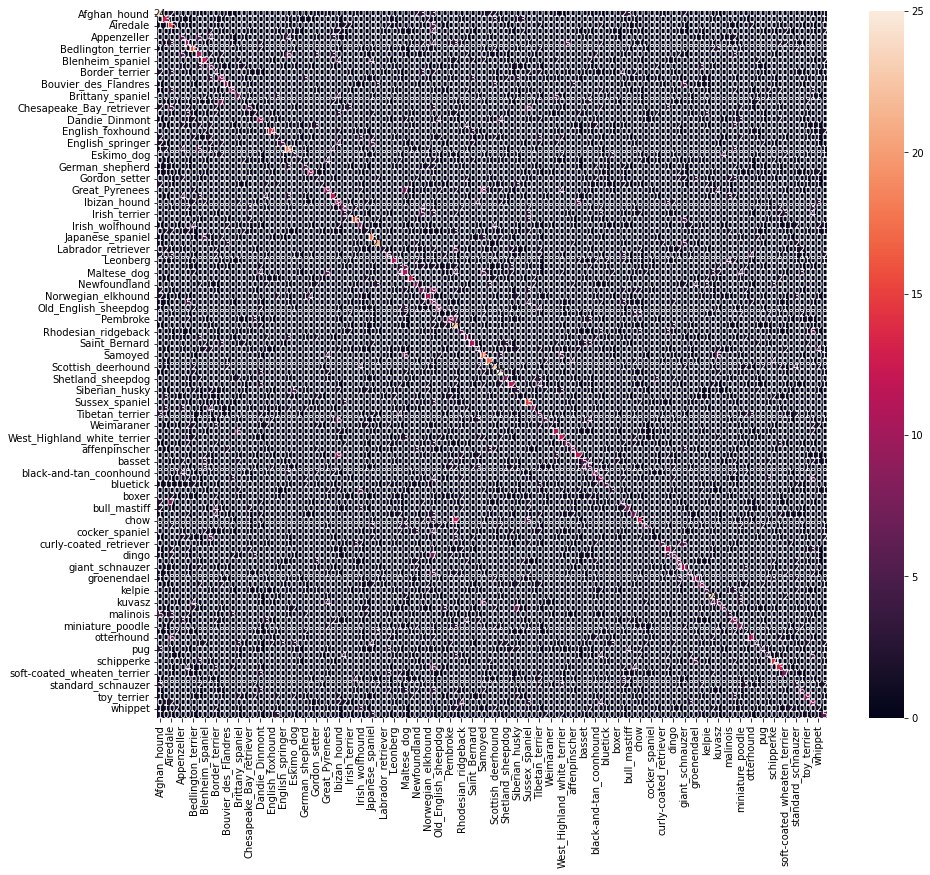

In [15]:
from sklearn.metrics import classification_report
def class_report(model,valid_dataset,valid_labels,dog_race_dict):
    '''
    Computes and displays classification reports.
    '''
    Y_pred = model.predict(valid_dataset)
    valid_labels_pred = np.argmax(Y_pred, axis=1)
    print('Classification Report')
    a=classification_report(valid_labels, valid_labels_pred, target_names=dog_race_dict.keys())
    print(a)
    return a
import seaborn as sn
from sklearn.metrics import confusion_matrix
def conf_matr(model,valid_dataset,valid_labels,dog_race_dict):
    '''
    Computes and plots the confusion matrix
    '''
    Y_pred = model.predict(valid_dataset)
    valid_labels_pred = np.argmax(Y_pred, axis=1)
    array = confusion_matrix(valid_labels, valid_labels_pred)
    df_cm = pd.DataFrame(array, index = [i for i in dog_race_dict.keys()],
                      columns = [i for i in dog_race_dict.keys()])

    plt.figure(figsize = (15,13)).patch.set_facecolor('w')
    sn.heatmap(df_cm, annot=True)
    return df_cm
df_cm=conf_matr(net_final,valid2_generator,true_labels,dog_race_dict=class_dict)
class_report=class_report(net_final,valid2_generator,true_labels,dog_race_dict=class_dict)

